![](https://raw.githubusercontent.com/SunnySuite/Sunny.jl/main/assets/sunny_logo.jpg)
_This is a [tutorial](https://github.com/SunnySuite/SunnyTutorials/tree/main/tutorials)
 for the [Sunny](https://github.com/SunnySuite/Sunny.jl/) package,
 which enables dynamical simulations of ordered and thermally disordered spins with dipole
 and higher order moments._

## Welcome to a Sunny Tutorial on the Distorted Kagome Lattice System KCu<sub>3</sub>As<sub>2</sub>O<sub>7</sub>(OD)<sub>3</sub>
**Script**: Distorted Kagome Lattice Calculation <br>
**Inspired by**:KCu<sub>3</sub>As<sub>2</sub>O<sub>7</sub>(OD)<sub>3</sub> SpinW tutorial (Gøran Nilsen and Sandor Toth https://spinw.org/tutorials/18tutorial). Parameters taken from Nilsen et al. https://doi.org/10.1103/PhysRevB.89.140412 <br>
**Authors**: Harry Lane <br>
**Date**: August 15, 2023  (Sunny 0.5.0) <br>
**Goal**: This script is to calculate the linear spin wave theory spectrum for KCu<sub>3</sub>As<sub>2</sub>O<sub>7</sub>(OD)<sub>3</sub> and compare with the results from SpinW.  

This tutorial illustrates the calculation of the linear spin wave spectrum of KCu<sub>3</sub>As<sub>2</sub>O<sub>7</sub>(OD)<sub>3</sub> using the crystal structure and parameters found in <a href="https://doi.org/10.1103/PhysRevB.89.140412 ">Nilsen et al., Phys. Rev. B **89**, 140412(R)</a>.

In [1]:
using Sunny, GLMakie, LinearAlgebra

Set up a [`Crystal`](@ref) using the parameters from <a href="https://doi.org/10.1103/PhysRevB.89.140412 ">Nilsen et al., Phys. Rev. B **89**, 140412(R)</a>.

In [2]:
a = 10.20 # (Å)
b = 5.94
c = 7.81
latvecs = lattice_vectors(a, b, c, 90, 117.7, 90)
crystal = Crystal(latvecs, [[0,0,0],[1/4,1/4,0]], 12, setting = "b1")

Crystal
HM symbol 'C 2/m = C 1 2/m 1' (12)
Lattice params a=10.2, b=5.94, c=7.81, α=90°, β=117.7°, γ=90°
Cell volume 419
Wyckoff 2a (point group '2/m'):
   1. [0, 0, 0]
   2. [0.5, 0.5, 0]
Wyckoff 4e (point group '-1'):
   3. [0.25, 0.25, 0]
   4. [0.75, 0.25, 0]
   5. [0.25, 0.75, 0]
   6. [0.75, 0.75, 0]


The next step is to add interactions. The command [`print_symmetry_table`](@ref) shows all symmetry-allowed interactions up to a cutoff distance.

In [3]:
print_symmetry_table(crystal,7.1)

Atom 1
Position [0, 0, 0], multiplicity 2
Allowed g-tensor: |   A    0  D-E |
                  |   0    B    0 |
                  | D+E    0    C |
Allowed anisotropy in Stevens operators:
    c₁*𝒪[2,0] + c₂*𝒪[2,1] + c₃*𝒪[2,2] +
    c₄*𝒪[4,0] + c₅*𝒪[4,1] + c₆*𝒪[4,2] + c₇*𝒪[4,3] + c₈*𝒪[4,4] +
    c₉*𝒪[6,0] + c₁₀*𝒪[6,1] + c₁₁*𝒪[6,2] + c₁₂*𝒪[6,3] + c₁₃*𝒪[6,4] + c₁₄*𝒪[6,5] + c₁₅*𝒪[6,6]

Atom 3
Position [0.25, 0.25, 0], multiplicity 4
Allowed g-tensor: |   A  F+I  E-H |
                  | F-I    B  D+G |
                  | E+H  D-G    C |
Allowed anisotropy in Stevens operators:
    c₁*𝒪[2,-2] + c₂*𝒪[2,-1] + c₃*𝒪[2,0] + c₄*𝒪[2,1] + c₅*𝒪[2,2] +
    c₆*𝒪[4,-4] + c₇*𝒪[4,-3] + c₈*𝒪[4,-2] + c₉*𝒪[4,-1] + c₁₀*𝒪[4,0] + c₁₁*𝒪[4,1] + c₁₂*𝒪[4,2] + c₁₃*𝒪[4,3] + c₁₄*𝒪[4,4] +
    c₁₅*𝒪[6,-6] + c₁₆*𝒪[6,-5] + c₁₇*𝒪[6,-4] + c₁₈*𝒪[6,-3] + c₁₉*𝒪[6,-2] + c₂₀*𝒪[6,-1] + c₂₁*𝒪[6,0] + c₂₂*𝒪[6,1] + c₂₃*𝒪[6,2] + c₂₄*𝒪[6,3] + c₂₅*𝒪[6,4] + c₂₆*𝒪[6,5] + c₂₇*𝒪[6,6]

Bond(1, 3, [0, 0, 0])
Distance 2.9508854603322, co

The magnetic structure of KCu<sub>3</sub>As<sub>2</sub>O<sub>7</sub>(OD)<sub>3</sub> has the incommensurate ordering wavevector $\mathbf{Q}\approx(0.77,0,0.11)$. We supply this ordering wavevector to the helper function `[define_magnetic_structure]`

We supply the experimentally determined wavevector and allow it to be rationalized. Here we employ the helical mode to propagate the magnetic structure within the unit cell using the fractional positions.

In [4]:
Slist=[[1,0,0]]*1/2
n=[0,0,1]
kvec=[0.77, 0, 0.115]
S=1/2
Spinfo= [SpinInfo(1; S, g=2), SpinInfo(3; S, g=2)]
sys = System(crystal,(1,1,1),Spinfo,:dipole)
sys = define_magnetic_structure(sys,kvec,n,Slist,"helical")

No spin coordinate system provided, assuming spins are defined in Cartesian coordinates
One spin provided. Propogating magnetic structure using fractional atomic coordinates.


System [Dipole mode]
Lattice: (9, 1, 8)×6


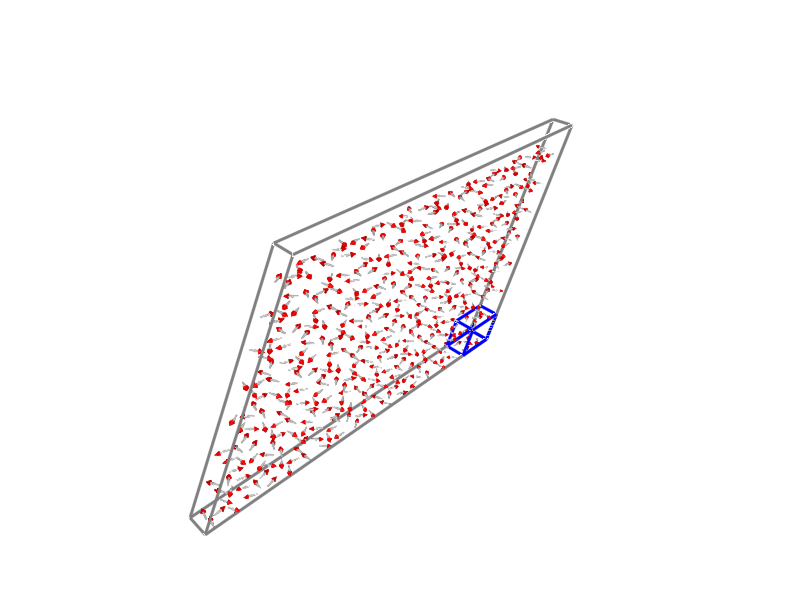

In [5]:
ps=plot_spins(sys)

In [6]:
rn_seed = 5
S = 1/2
J = -2.0
Jp = -1.0
Jab = 0.75
Ja = -J/(0.66) -Jab
Jic = 0.01
set_exchange!(sys, J, Bond(1, 3, [0,0,0]))
set_exchange!(sys, Jp, Bond(3, 5, [0,0,0]))
set_exchange!(sys, Ja, Bond(3, 4, [0,0,0]))
set_exchange!(sys, Jab, Bond(1, 2, [0,0,0])) # difference in symmetry between SpinW and Sunny on bond 4,4'
set_exchange!(sys, Jic, Bond(3, 4, [0,0,1]))

The next step is to build a [`SpinWaveTheory`](@ref) object.

In [7]:
swt = SpinWaveTheory(sys;energy_tol=0.01,energy_ϵ = 1e-2 );

Before calculating the linear spin wave intensity, we must define a path in reciprocal space. We plot along the direction $[\xi,0,0]$.

In [8]:
points_rlu = [[0.,0,0],[1.0,0,0]];
density = 75
path, xticks = reciprocal_space_path(crystal, points_rlu, density);

We now create an intensity formula using a delta function kernel and calculate the intensity of each band using [`intensites_bands`](@ref) 

In [9]:
path, xticks = reciprocal_space_path(crystal,points_rlu, density);
formula = intensity_formula(swt; kernel=delta_function_kernel)
disp, intensity = intensities_bands(swt, path; formula);

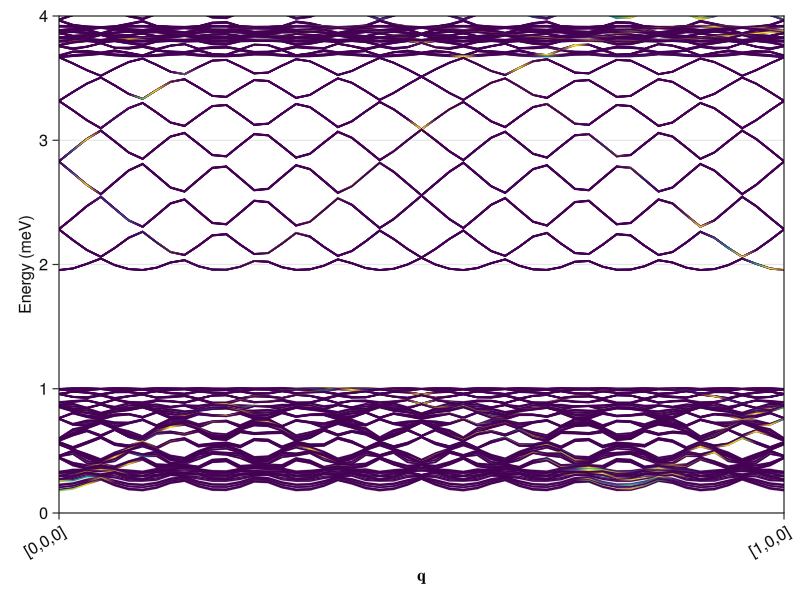

In [10]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel="𝐪", ylabel="Energy (meV)", xticks, xticklabelrotation=π/6)
ylims!(ax, 0.0, 4)
xlims!(ax, 1, size(disp, 1))
for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i]; color=intensity[:,i])
end
fig

Finally we plot the broadened neutron scattering intensity along the path we defined above.

In [11]:
γ = 0.15 # width in meV
broadened_formula = intensity_formula(swt, :perp; kernel=lorentzian(γ), mode_fast=true)
energies = collect(0:0.005:4)  # 0 < ω < 6 (meV).
is = intensities_broadened(swt, [q for q in path], energies, broadened_formula);

This calculation took a long time since the magnetic unit cell contains $3 \times 9 \times 1 \times 9 = 243$ sites. I

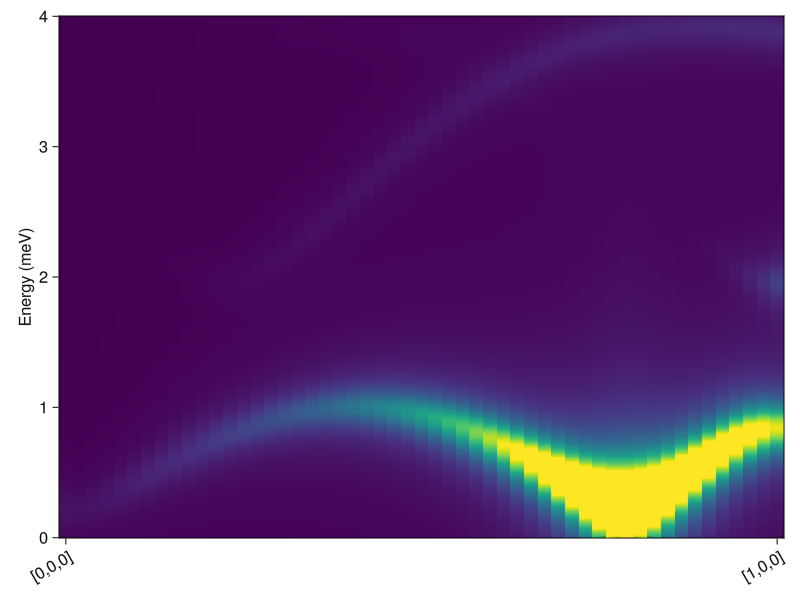

In [12]:
fig = Figure()
ax = Axis(fig[1,1]; ylabel="Energy (meV)", xticks, xticklabelrotation=π/6)
heatmap!(ax, 1:size(is, 1), energies, is,colorrange = (0,2))
fig